# DECISION TREE - Flight delays 

> - Phases:
    - Building Phase
      - Preprocess the dataset.
      - Split the dataset from train and test using Python sklearn package.
      - Train the classifier.
    - Operational Phase
      - Make predictions.
      - Calculate the accuracy.

## Data dictionary
* CRS_DEP_TIME - scheduled departure time
* CARRIER - The airline
* DEP_TIME - Actual departure time
* DEST - Destination airport in NY: Kennedy (JFK), LaGuardia (LGA), Newark (EWR)
* DISTANCE - Flight distance in miles
* FL_DATE - Flight date
* FL_NUM - Flight number
* ORIGIN - Departure airport in Washingon DC: National (DCA), Baltimore-Washington (BWI), 
 Dulles (IAD)
* Weather - Whether the weather was inclement (1) or not (0)
* DAY_WEEK
* DAY_OF_MONTH   	 
* TAIL_NUM - This number is airplane specific
* Flight Status - Whether the flight was delayed or on time (defined as arriving within 15 min of scheduled time)

Carrier Code    Carrier Name
* AA   	 	American Airlines, Inc.
* CO   	 	Continental Air Lines, Inc.
* DH   	 	Atlantic Coast Airlines
* DL   	 	Delta Air Lines, Inc.
* EV   	 	Atlantic Southeast Airlines
* FL   	 	Airtran Airways Corporation
* MQ   	 	American Eagle Airlines,inc
* OH   	 	Comair, Inc.
* RU   	 	Continental Express Airline
* UA   	 	United Air Lines, Inc.
* US   	 	US Airways, Inc.




> # Objectives:
 - To explore flight delay patterns
 - To determine an optimal machine learning model to predict if a flight will be delayed
 - To identify variables that cause a flight delay


## IMPLEMENTATION DTs 

#### Imports

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline


#### Loading

In [31]:
flight_df = pd.read_csv("FlightDelays.csv")
flight_df.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH',
       'MONTH_OF_YEAR', 'TAIL_NUM', 'Status'],
      dtype='object')

In [32]:
#Remove redundant columns
flight_df = flight_df.drop(['FL_NUM','TAIL_NUM','DEP_TIME', 'FL_DATE'], axis=1)

#### To Check Data is Numeric or Categorical?


In [33]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
CRS_DEP_TIME     2201 non-null int64
CARRIER          2201 non-null object
DEST             2201 non-null object
DISTANCE         2201 non-null int64
ORIGIN           2201 non-null object
Weather          2201 non-null int64
DAY_WEEK         2201 non-null int64
DAY_OF_MONTH     2201 non-null int64
MONTH_OF_YEAR    2201 non-null object
Status           2201 non-null object
dtypes: int64(5), object(5)
memory usage: 172.0+ KB


In [34]:
#Convert relevant columns to categorical variables
flight_df['Status']=flight_df['Status'].astype('category')
flight_df['Weather']=flight_df['Weather'].astype('category')
flight_df['DAY_WEEK']=flight_df['DAY_WEEK'].astype('category')
flight_df['DAY_OF_MONTH']=flight_df['DAY_OF_MONTH'].astype('category')
flight_df['MONTH_OF_YEAR']=flight_df['MONTH_OF_YEAR'].astype('category')
flight_df['CARRIER']=flight_df['CARRIER'].astype('category')
flight_df['DEST']=flight_df['DEST'].astype('category')
flight_df['ORIGIN']=flight_df['ORIGIN'].astype('category')

#### Summary of the data

In [35]:
flight_df.describe()

CRS_DEP_TIME     DISTANCE
count   2201.000000  2201.000000
mean    1371.938664   211.871422
std      432.697149    13.316815
min      600.000000   169.000000
25%     1000.000000   213.000000
50%     1455.000000   214.000000
75%     1710.000000   214.000000
max     2130.000000   229.000000

In [36]:
##Convert departure time to extract hour of departure
flight_df['hr_of_dep'] = round(flight_df['CRS_DEP_TIME']/100,0)
flight_df['hr_of_dep']=flight_df['hr_of_dep'].astype('int')
flight_df['hr_of_dep']=flight_df['hr_of_dep'].astype('category')

In [37]:
flight_df['hr_of_dep'].value_counts()

15    292
17    241
16    178
8     164
12    142
21    137
7     133
13    132
6     126
14    123
19    119
9     108
10    100
18     85
11     68
20     53
Name: hr_of_dep, dtype: int64

In [38]:
#Drop dept time column
flight_df = flight_df.drop(['CRS_DEP_TIME'], axis=1)

In [39]:
flight_df.isnull().sum()

CARRIER          0
DEST             0
DISTANCE         0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
MONTH_OF_YEAR    0
Status           0
hr_of_dep        0
dtype: int64

In [40]:
#levels of Y variable
flight_df['Status'].value_counts()

ontime     1773
delayed     428
Name: Status, dtype: int64

#### Imbalanced dataset

## Splitting the dataset

In [41]:
#Create dataframes for X and Y variables
x = flight_df.drop(["Status"], axis=1)
y = flight_df[['Status']]
print(x.shape)
print(y.shape)

(2201, 9)
(2201, 1)


In [42]:
##Convert x to dummy variables
x=pd.get_dummies(x)

In [43]:
x.columns

Index(['DISTANCE', 'CARRIER_CO', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ',
       'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US', 'DEST_EWR',
       'DEST_JFK', 'DEST_LGA', 'ORIGIN_BWI', 'ORIGIN_DCA', 'ORIGIN_IAD',
       'Weather_0', 'Weather_1', 'DAY_WEEK_1', 'DAY_WEEK_2', 'DAY_WEEK_3',
       'DAY_WEEK_4', 'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7',
       'DAY_OF_MONTH_1', 'DAY_OF_MONTH_2', 'DAY_OF_MONTH_3', 'DAY_OF_MONTH_4',
       'DAY_OF_MONTH_5', 'DAY_OF_MONTH_6', 'DAY_OF_MONTH_7', 'DAY_OF_MONTH_8',
       'DAY_OF_MONTH_9', 'DAY_OF_MONTH_10', 'DAY_OF_MONTH_11',
       'DAY_OF_MONTH_12', 'DAY_OF_MONTH_13', 'DAY_OF_MONTH_14',
       'DAY_OF_MONTH_15', 'DAY_OF_MONTH_16', 'DAY_OF_MONTH_17',
       'DAY_OF_MONTH_18', 'DAY_OF_MONTH_19', 'DAY_OF_MONTH_20',
       'DAY_OF_MONTH_21', 'DAY_OF_MONTH_22', 'DAY_OF_MONTH_23',
       'DAY_OF_MONTH_24', 'DAY_OF_MONTH_25', 'DAY_OF_MONTH_26',
       'DAY_OF_MONTH_27', 'DAY_OF_MONTH_28', 'DAY_OF_MONTH_29',
       'DAY_OF_MONTH_30', 'DAY_OF_

In [44]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

In [45]:
X_train.shape,X_test.shape

((1540, 83), (661, 83))

## Model1:- Criterion='gini'

In [46]:
model_gini=DecisionTreeClassifier()

In [47]:
model_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
preds_gini = model_gini.predict(X_test)

## Evaluation Metrics

In [49]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[ 46  79]
 [ 65 471]]


In [50]:
#Calculate accuracy
print(accuracy_score(y_test,preds_gini))

0.7821482602118003


In [51]:
print(metrics.classification_report(y_test,preds_gini))

             precision    recall  f1-score   support

    delayed       0.41      0.37      0.39       125
     ontime       0.86      0.88      0.87       536

avg / total       0.77      0.78      0.78       661



## Model1:- Criterion='entropy'

In [52]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [53]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
preds_entropy = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)

In [55]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[ 45  80]
 [ 55 481]]


## Evaluation Metrics

In [56]:
print(accuracy_score(y_test,preds_entropy))
print(accuracy_score(y_train,preds_entropy_train))

0.7957639939485628
0.9987012987012988


#### Accuracy of train data is 100% whereas accuracy of test data is only 63% indicating an overfit model

In [57]:
print(metrics.classification_report(y_test,preds_entropy))

             precision    recall  f1-score   support

    delayed       0.45      0.36      0.40       125
     ontime       0.86      0.90      0.88       536

avg / total       0.78      0.80      0.79       661



In [58]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_entropy = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_entropy)

confusion matrix = 
 [[ 45  80]
 [ 55 481]]


## Visualizing the tree

In [59]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [60]:
feature_cols = x.columns

### Tree from entropy

In [61]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('delay_entropy.png')
Image(graph.create_png())

https://www.youtube.com/watch?v=f85ARatXIFA

#### The tree is overgrown due to which there is overfitting - we will now prune the tree and re-evaluate the model

## Pruning

In [64]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

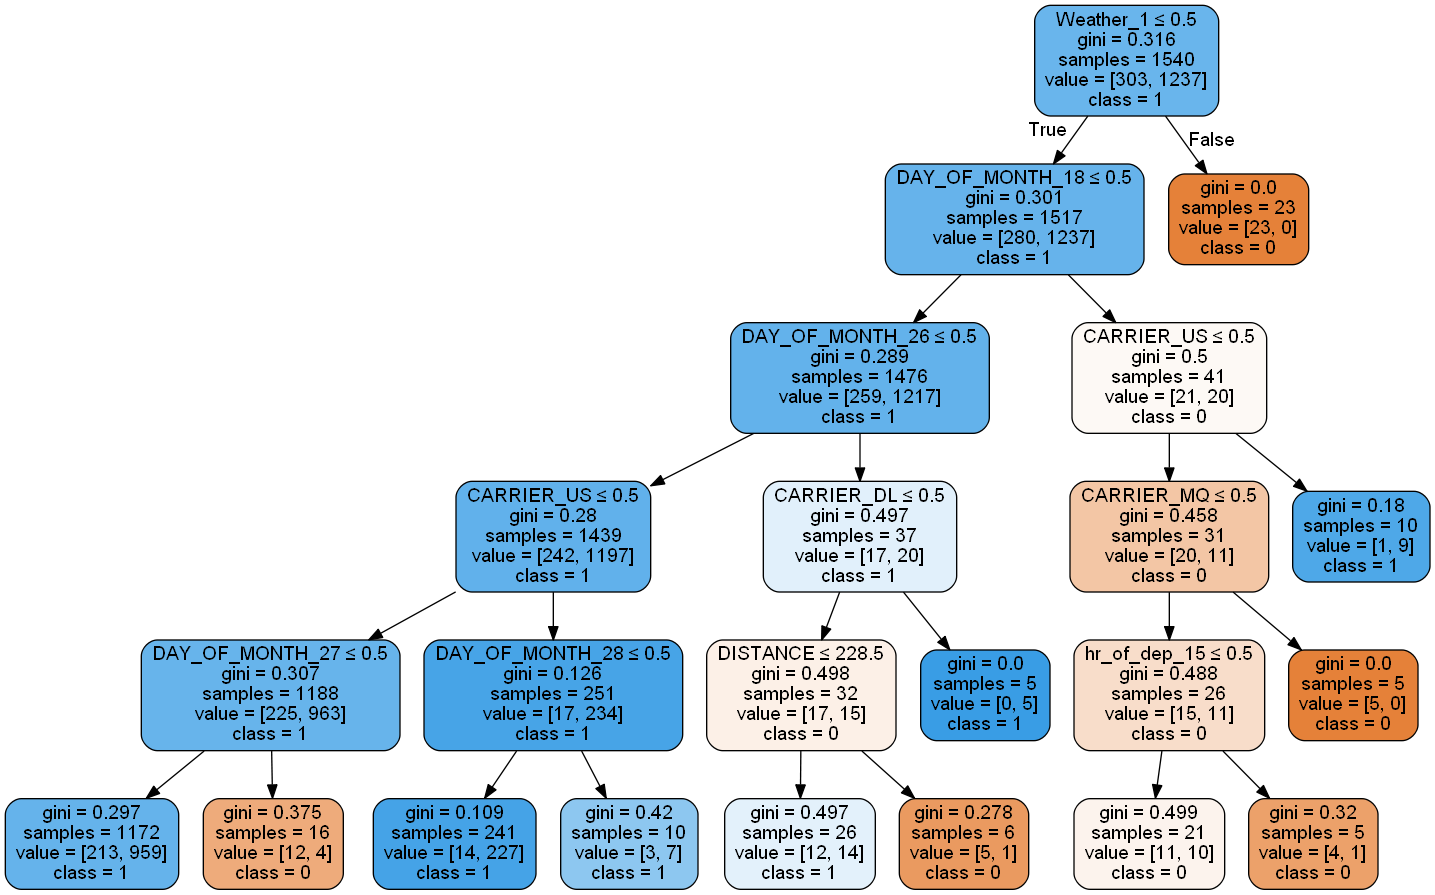

In [65]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('delay_pruned.png')
Image(graph.create_png())

In [66]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [67]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,preds_pruned)

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[ 17 108]
 [ 13 523]]


In [68]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.8169440242057489
0.8318181818181818


In [69]:
print(metrics.classification_report(y_test,preds_pruned))

             precision    recall  f1-score   support

    delayed       0.57      0.14      0.22       125
     ontime       0.83      0.98      0.90       536

avg / total       0.78      0.82      0.77       661



## Calculating feature importance

In [70]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.00087517 0.         0.         0.00158499 0.00097483 0.
 0.         0.         0.00690189 0.         0.         0.
 0.         0.         0.         0.         0.01956457 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.005874
 0.         0.         0.         0.         0.         0.
 0.         0.00397492 0.00661963 0.00072972 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00040008 0.
 0.         0.         0.         0.         0.        ]


In [72]:
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(10)

0
Weather_1        0.411888
CARRIER_US       0.145304
DAY_OF_MONTH_27  0.139361
DAY_OF_MONTH_18  0.123664
DAY_OF_MONTH_26  0.083683
CARRIER_DL       0.033368
CARRIER_MQ       0.020523
DISTANCE         0.018425
DAY_OF_MONTH_28  0.015363
hr_of_dep_15     0.008423